# Machine Learning Glass identification project

In [2]:
#importing all the libraries

import pandas as pd
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score 
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score, recall_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the glass identification dataset

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv"
names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba','Fe','Type'] 

# execute help(glass_columns) to get full details of attributes and target class
# execute help(glass_class_distribution) to get full details of distribution of class over data

feature_names = names[:9]
data = pd.read_csv(url, names=names)


In [4]:
def glass_columns():
    '''
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
    '''
def glass_class_distribution():
    '''
    Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps
    '''

In [5]:
help(glass_columns)

Help on function glass_columns in module __main__:

glass_columns()
     1. Id number: 1 to 214
     2. RI: refractive index
     3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                    are attributes 4-10)
     4. Mg: Magnesium
     5. Al: Aluminum
     6. Si: Silicon
     7. K: Potassium
     8. Ca: Calcium
     9. Ba: Barium
    10. Fe: Iron
    11. Type of glass: (class attribute)
        -- 1 building_windows_float_processed
        -- 2 building_windows_non_float_processed
        -- 3 vehicle_windows_float_processed
        -- 4 vehicle_windows_non_float_processed (none in this database)
        -- 5 containers
        -- 6 tableware
        -- 7 headlamps



In [6]:
data.isna().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
def show_num_inst(data,title=str):
  # count number of instances of each class 
  class_counts = data['Type'].value_counts()
    
  # Define index and values for the graph
  labels = class_counts.index
  values = class_counts.values

  # Configure and show graph
  plt.bar(labels, values)
  plt.xlabel('Type')
  plt.ylabel('Count')
  plt.title(title)
  plt.show()

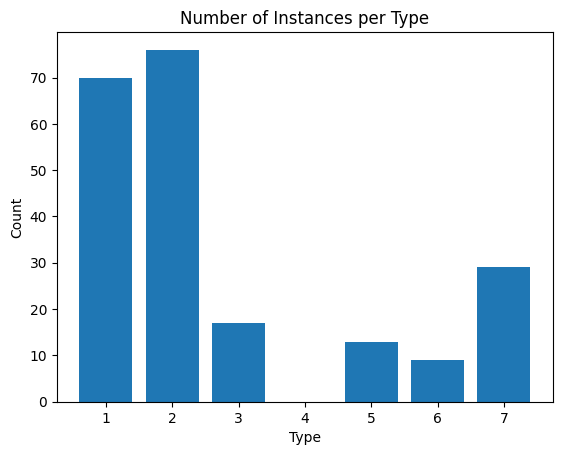

In [9]:
show_num_inst(data,"Number of Instances per Type")

In [10]:
#Splitting the data into dependent and independent variables
X = data.drop("Type", axis=1)
Y =  data["Type"]

### Question 1 : Show the attributes and the target variable

In [11]:
print('Attributes of our data :',X.columns.values) # attributes of our data, equivalent to the list feature_names
print('Target variable :',data.columns.values[-1]) # target variable "Type"


Attributes of our data : ['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe']
Target variable : Type


In [12]:
def plot_input(X,Y,p1,p2,title=""):
  # Convert the data from numpy array to a pandas dataframe
  df_ros = pd.DataFrame({p1: X[p1], p2: X[p2], 'target': Y})
  # Plot the chart
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x = p1, y = p2, hue = 'target', data = df_ros)
  plt.title(title) 
  print(df_ros)

> This function allows us to insert two attributes of our choice and use scatter plot to visualize the distribution of the object in relation to the two attributes, while trying to find the best combination that will allow us to effectively separate the two classes (0 and 1).

### Question 2 : Display the previous graph using different attributes

          RI     Na  target
0    1.52101  13.64       1
1    1.51761  13.89       1
2    1.51618  13.53       1
3    1.51766  13.21       1
4    1.51742  13.27       1
..       ...    ...     ...
209  1.51623  14.14       7
210  1.51685  14.92       7
211  1.52065  14.36       7
212  1.51651  14.38       7
213  1.51711  14.23       7

[214 rows x 3 columns]


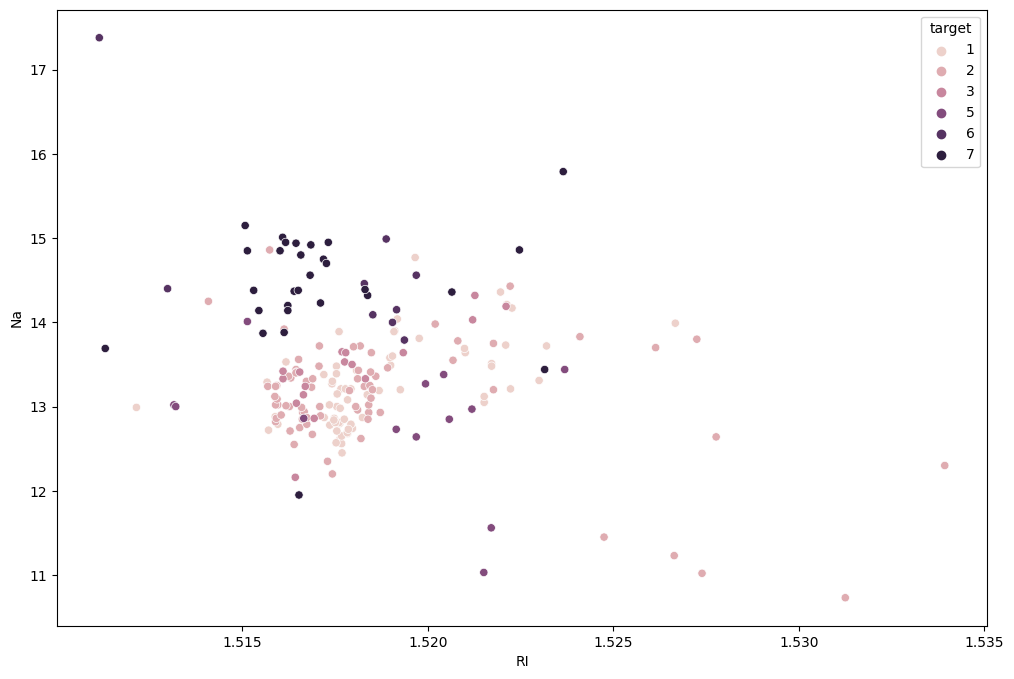

In [13]:
plot_input(X,Y,"RI","Na")

       Ba   Fe  target
0    0.00  0.0       1
1    0.00  0.0       1
2    0.00  0.0       1
3    0.00  0.0       1
4    0.00  0.0       1
..    ...  ...     ...
209  1.06  0.0       7
210  1.59  0.0       7
211  1.64  0.0       7
212  1.57  0.0       7
213  1.67  0.0       7

[214 rows x 3 columns]


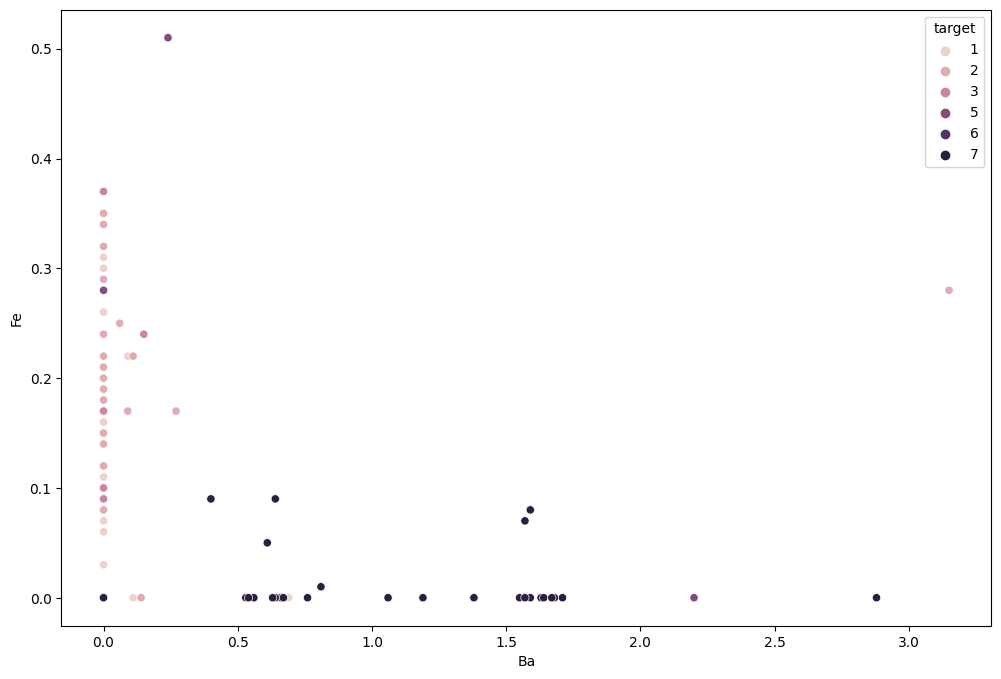

In [14]:
plot_input(X,Y,"Ba","Fe")

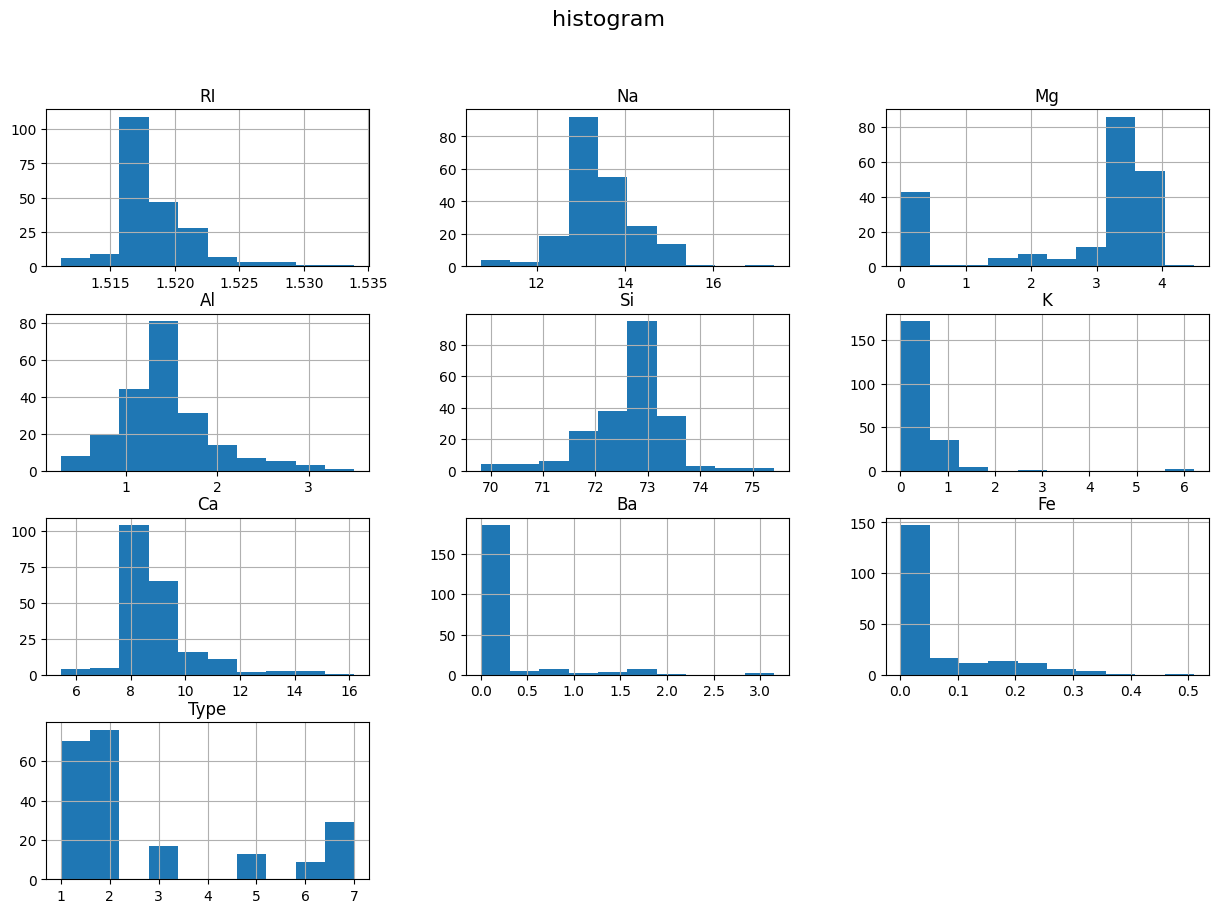

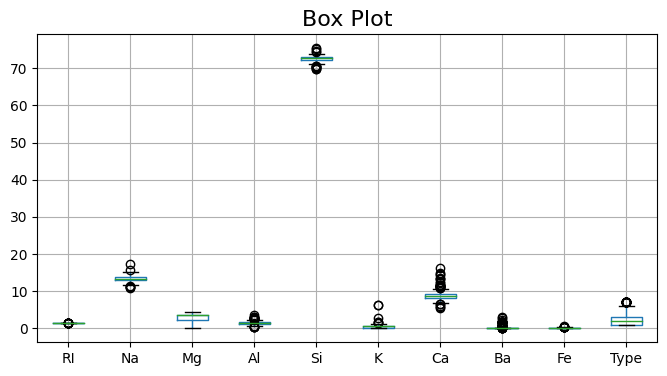

In [15]:
#histogramms 
data.hist(figsize=(15,10))
plt.suptitle("histogram", fontsize=16)
plt.show()
#boxplot
data.boxplot(figsize=(8,4))
plt.title("Box Plot", fontsize=16)
plt.show()

> The box plot is often used to determine the minimum and maximum quantiles... In our case, we notice that the Silicon "Si" attribute has the largest number of outliers, and it is also out of scale compared to the other attributes (scaling problem, normalization must be performed).

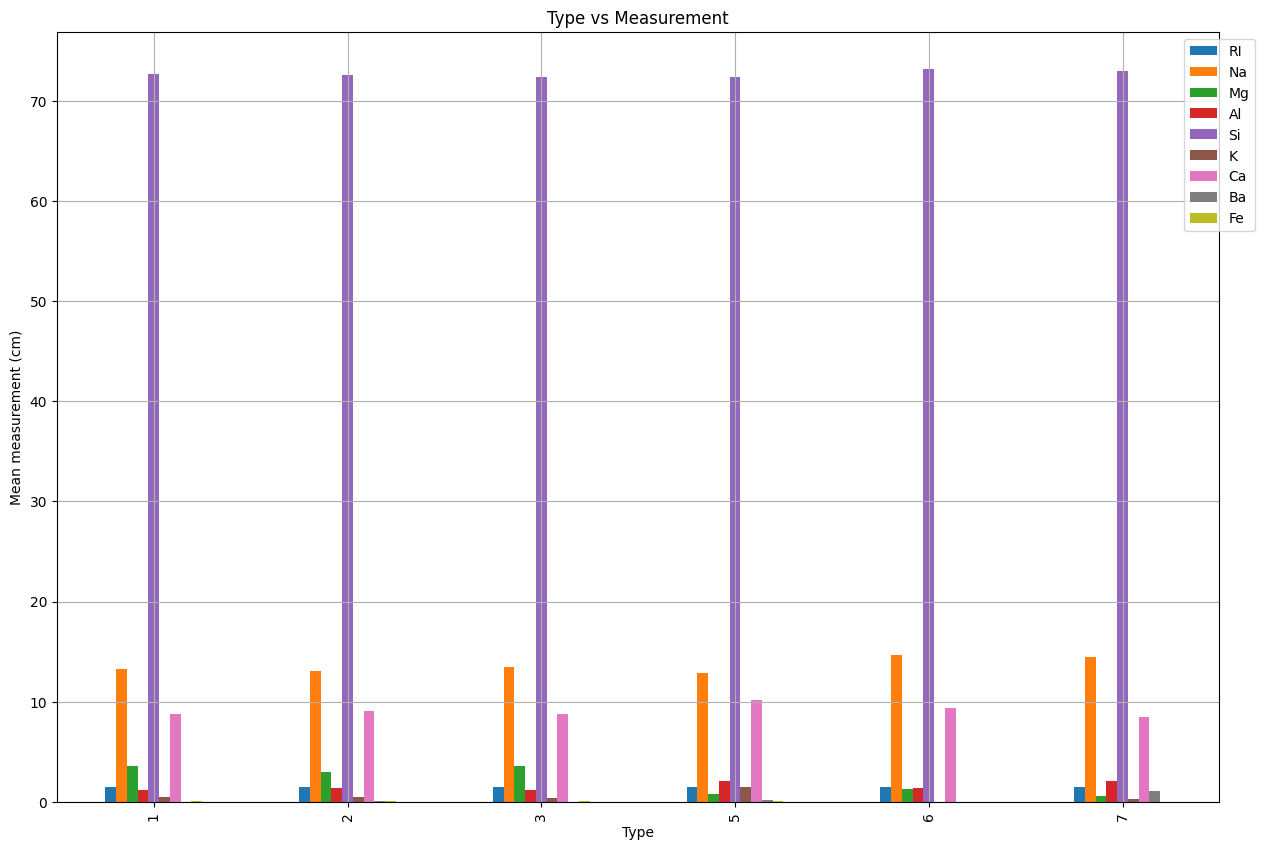

In [16]:
data.groupby(by = "Type").mean()
data.groupby(by="Type").mean().plot(kind="bar", figsize=(15,10))
plt.title('Type vs Measurement')
plt.ylabel('Mean measurement (cm)')
plt.grid(True)
plt.legend(loc="upper center", bbox_to_anchor=(1,1))

> The pandas 'groupby' function was used to separate the data into seven parts (1 to 7 execute help(glass_columns) to see names of classes), and then we used 'mean' to take a closer look and fix the scaling problem. We notice that the Purple "Si"  as well as the Pink "Ca" and Orange plot  "Na" have huge measurements compared to the other attributes (Fe, K, RI ...).

In [17]:
scaler = MinMaxScaler()
#here we use the MinMaxScaler that have multy methods as fit and transform or both combined 
#fit_transform( that computes min and max with fit and apply it on all data with transform )
X = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=5)
#check transformations
print(X[:5,:])

#Save new dataset
df = pd.DataFrame(X, columns = feature_names) #list features names containing features names
X = pd.DataFrame(X,  columns = feature_names)
df["Type"]=Y

[[0.43284 0.43759 1.      0.25234 0.35179 0.00966 0.30855 0.      0.     ]
 [0.28358 0.47519 0.80178 0.33333 0.52143 0.07729 0.22305 0.      0.     ]
 [0.22081 0.42105 0.79065 0.38941 0.56786 0.0628  0.2184  0.      0.     ]
 [0.28578 0.37293 0.82183 0.31153 0.5     0.09179 0.25929 0.      0.     ]
 [0.27524 0.38195 0.80624 0.29595 0.58393 0.08857 0.24535 0.      0.     ]]


In [18]:
df[:5]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,1


### Question 3 : Display the  graph of the figure 5 and 6 after normalization

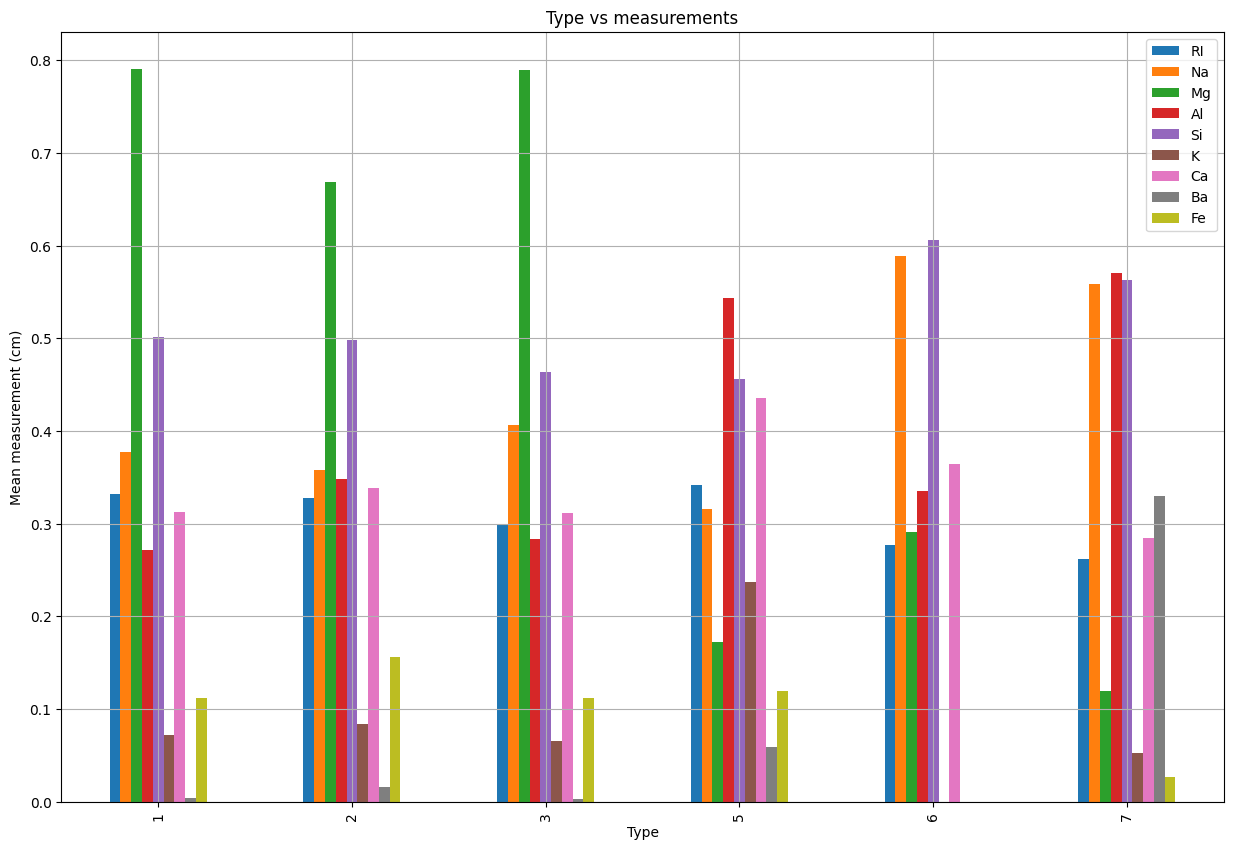

In [19]:
df.groupby(by = "Type").mean()
df.groupby(by="Type").mean().plot(kind="bar", figsize=(15,10))
plt.title('Type vs measurements')
plt.ylabel('Mean measurement (cm)')
plt.grid(True)
plt.legend(loc="upper right", bbox_to_anchor=(1,1))

### Under Sampling

In [20]:
from imblearn.under_sampling import RandomUnderSampler
y = df["Type"]
rus = RandomUnderSampler()
X1,y1 = rus.fit_resample(X, Y)
print(X1)
print(X1,y1)
data1 = pd.DataFrame(X1)
data1["Type"] = y1 #because to the memory copy in python, X here gain again the"Type" column that's why we should get rid of it
X1=X1.drop("Type",axis='columns')

          RI        Na        Mg        Al        Si         K        Ca  \
0   0.211150  0.309774  0.804009  0.414330  0.564286  0.103060  0.245353   
1   0.293679  0.353383  0.777283  0.308411  0.544643  0.096618  0.284387   
2   0.277436  0.317293  0.779510  0.264798  0.617857  0.090177  0.289963   
3   0.280509  0.413534  0.832962  0.274143  0.567857  0.095008  0.241636   
4   0.272169  0.344361  0.788419  0.436137  0.521429  0.086957  0.279740   
5   0.283582  0.312782  0.788419  0.292835  0.612500  0.093398  0.275093   
6   0.304214  0.406015  0.639198  0.280374  0.541071  0.088567  0.334572   
7   0.265584  0.398496  0.779510  0.267913  0.542857  0.080515  0.278810   
8   0.482002  0.523308  0.850780  0.056075  0.350000  0.017713  0.384758   
9   0.220808  0.342857  0.779510  0.370717  0.550000  0.096618  0.250000   
10  0.260316  0.449624  0.819599  0.473520  0.401786  0.103060  0.227695   
11  0.240562  0.330827  0.788419  0.414330  0.562500  0.103060  0.241636   
12  0.210272

### Over Sampling

In [21]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X2, y2 = ros.fit_resample(X, Y)
data2 = pd.DataFrame(X2)
print(X2,y2)
data2["Type"] = y2
X2=X2.drop("Type",axis='columns')

           RI        Na        Mg        Al        Si         K        Ca  \
0    0.432836  0.437594  1.000000  0.252336  0.351786  0.009662  0.308550   
1    0.283582  0.475188  0.801782  0.333333  0.521429  0.077295  0.223048   
2    0.220808  0.421053  0.790646  0.389408  0.567857  0.062802  0.218401   
3    0.285777  0.372932  0.821826  0.311526  0.500000  0.091787  0.259294   
4    0.275241  0.381955  0.806236  0.295950  0.583929  0.088567  0.245353   
..        ...       ...       ...       ...       ...       ...       ...   
451  0.175154  0.619549  0.000000  0.663551  0.698214  0.000000  0.275093   
452  0.213784  0.619549  0.000000  0.651090  0.619643  0.000000  0.309480   
453  0.250219  0.630075  0.000000  0.529595  0.580357  0.000000  0.276022   
454  0.249342  0.575940  0.000000  0.526480  0.621429  0.000000  0.287175   
455  0.236172  0.183459  0.000000  0.280374  0.958929  0.434783  0.325279   

           Ba        Fe  
0    0.000000  0.000000  
1    0.000000  0.000000

### Smote Sampling

In [22]:
from  imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=3)
X3, y3 = smote.fit_resample(X, Y)
print(X3,y3)
data3 = pd.DataFrame(X3)
data3["Type"] = y3
X3=X3.drop("Type",axis='columns')

           RI        Na        Mg        Al        Si         K        Ca  \
0    0.432836  0.437594  1.000000  0.252336  0.351786  0.009662  0.308550   
1    0.283582  0.475188  0.801782  0.333333  0.521429  0.077295  0.223048   
2    0.220808  0.421053  0.790646  0.389408  0.567857  0.062802  0.218401   
3    0.285777  0.372932  0.821826  0.311526  0.500000  0.091787  0.259294   
4    0.275241  0.381955  0.806236  0.295950  0.583929  0.088567  0.245353   
..        ...       ...       ...       ...       ...       ...       ...   
451  0.336443  0.547198  0.000000  0.527889  0.659688  0.000000  0.281388   
452  0.217854  0.628842  0.000000  0.629912  0.621850  0.000000  0.306608   
453  0.217489  0.641985  0.000000  0.678130  0.586608  0.006602  0.313978   
454  0.445521  0.662287  0.549654  0.444226  0.176038  0.132533  0.178620   
455  0.375083  0.547707  0.000000  0.513497  0.603805  0.092724  0.204971   

           Ba        Fe  
0    0.000000  0.000000  
1    0.000000  0.000000

### Question 4 : Display the graph of the Figure 3 to see the number of instances of each class for each method

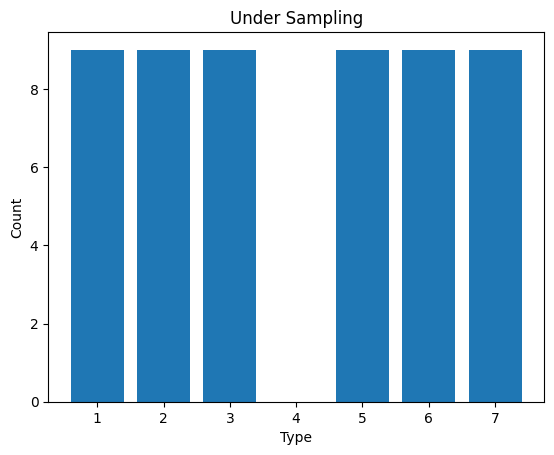

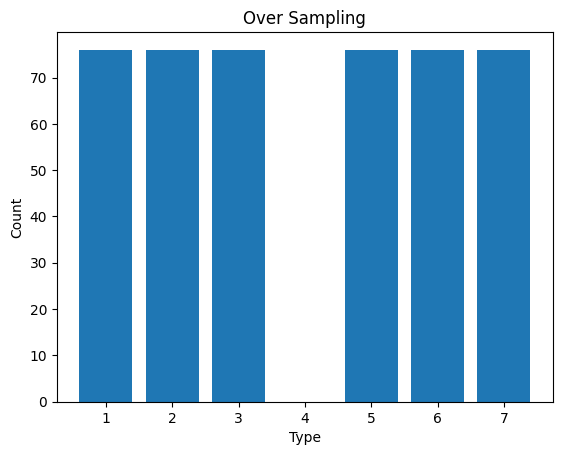

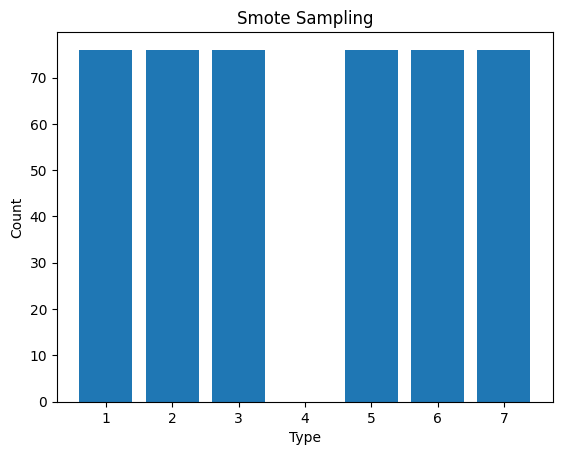

In [23]:
show_num_inst(data1,"Under Sampling")  #undersampling
show_num_inst(data2, "Over Sampling")  #oversampling
show_num_inst(data3, "Smote Sampling") #smote sampling

          RI        Na  target
0   0.211150  0.309774       1
1   0.293679  0.353383       1
2   0.277436  0.317293       1
3   0.280509  0.413534       1
4   0.272169  0.344361       1
5   0.283582  0.312782       1
6   0.304214  0.406015       1
7   0.265584  0.398496       1
8   0.482002  0.523308       1
9   0.220808  0.342857       2
10  0.260316  0.449624       2
11  0.240562  0.330827       2
12  0.210272  0.354887       2
13  0.215101  0.326316       2
14  0.332309  0.330827       2
15  0.882353  0.000000       2
16  0.208516  0.314286       2
17  0.232660  0.401504       2
18  0.441615  0.496241       3
19  0.314750  0.390977       3
20  0.298946  0.416541       3
21  0.237050  0.403008       3
22  0.254170  0.320301       3
23  0.291484  0.437594       3
24  0.241440  0.362406       3
25  0.231782  0.215038       3
26  0.359526  0.437594       3
27  0.440737  0.336842       5
28  0.088235  0.344361       5
29  0.413960  0.318797       5
30  0.463565  0.124812       5
31  0.38

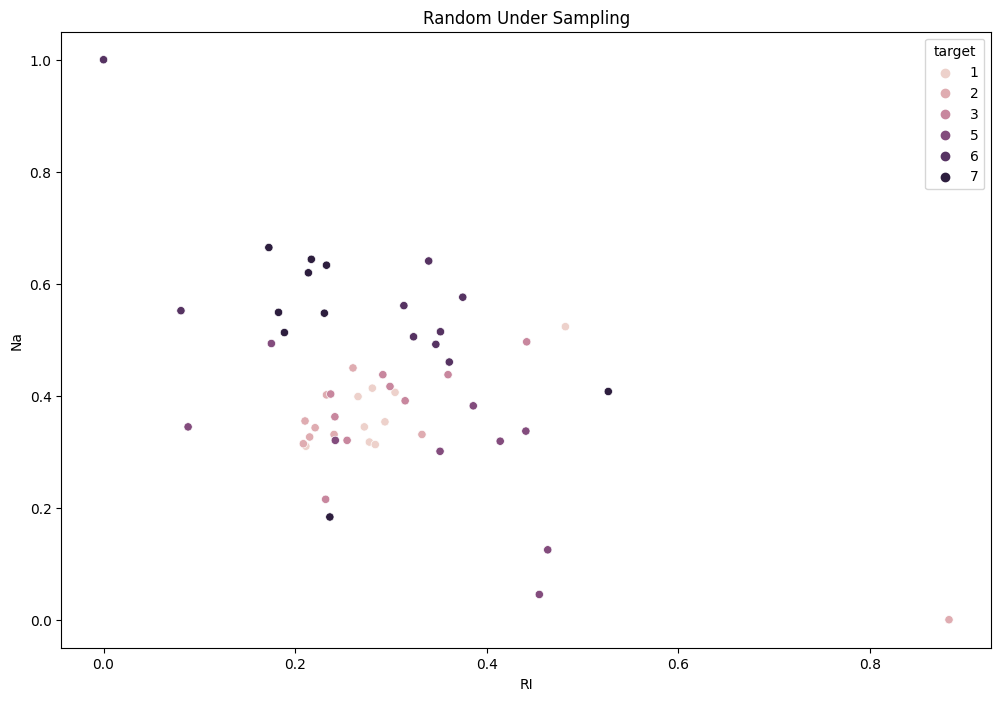

In [24]:
plot_input(X1,y1,"RI","Na",'Random Under Sampling')

           RI        Na  target
0    0.432836  0.437594       1
1    0.283582  0.475188       1
2    0.220808  0.421053       1
3    0.285777  0.372932       1
4    0.275241  0.381955       1
..        ...       ...     ...
451  0.175154  0.619549       7
452  0.213784  0.619549       7
453  0.250219  0.630075       7
454  0.249342  0.575940       7
455  0.236172  0.183459       7

[456 rows x 3 columns]


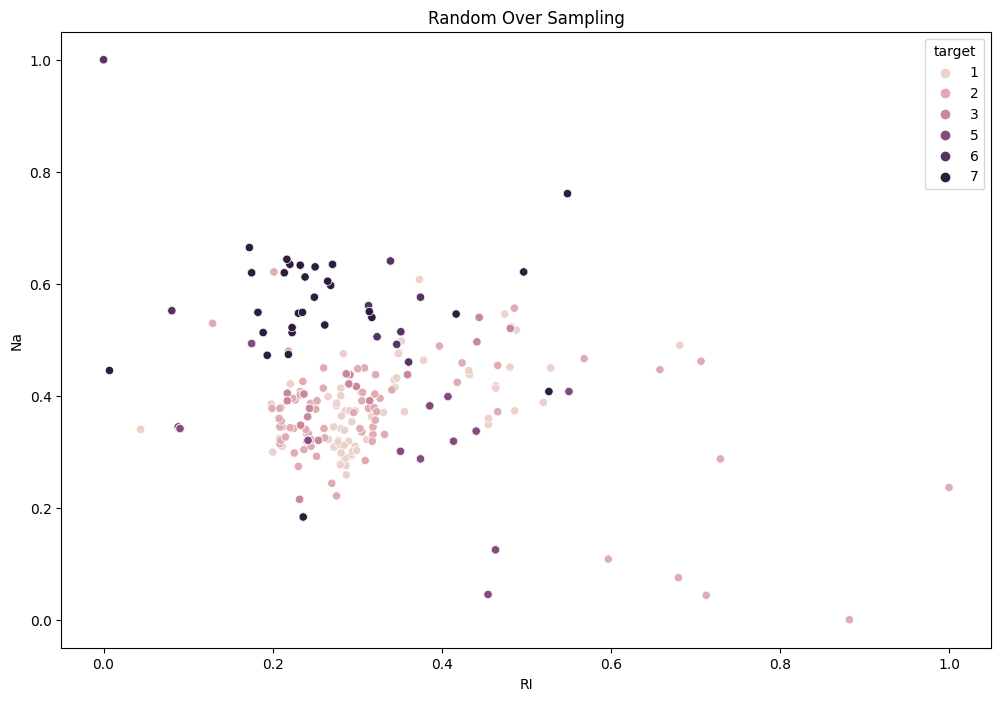

In [25]:
plot_input(X2,y2,"RI","Na",'Random Over Sampling')

           RI        Na  target
0    0.432836  0.437594       1
1    0.283582  0.475188       1
2    0.220808  0.421053       1
3    0.285777  0.372932       1
4    0.275241  0.381955       1
..        ...       ...     ...
451  0.336443  0.547198       7
452  0.217854  0.628842       7
453  0.217489  0.641985       7
454  0.445521  0.662287       7
455  0.375083  0.547707       7

[456 rows x 3 columns]


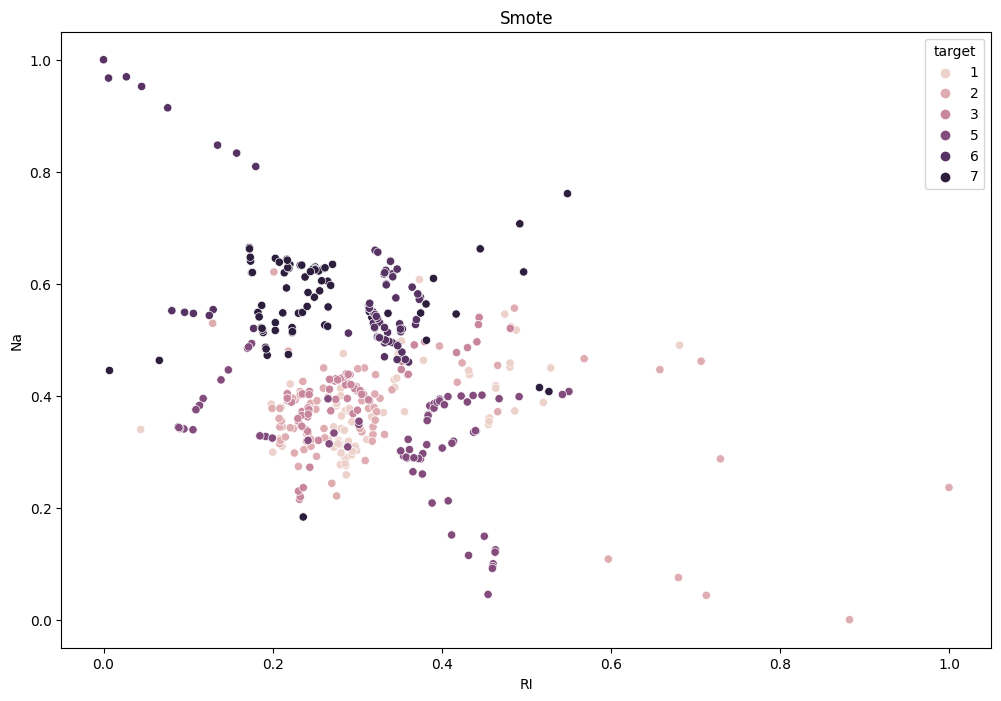

In [26]:
plot_input(X3,y3,"RI","Na",'Smote')

## Undersampled Dataset

### Information gain

In [27]:
feature_us_ig0=[] #we add prefix 0 to ed because later when we will extract first elements of each this will cause problems
MI_score_us = mutual_info_classif(X1, y1, random_state=0)
for feature in zip(feature_names, MI_score_us):
 print(feature)
 feature_us_ig0.append(feature)

('RI', 0.5102533896000288)
('Na', 0.3975246993012891)
('Mg', 0.7518480085019972)
('Al', 0.3257952554384733)
('Si', 0.09054709882130352)
('K', 0.515251843236888)
('Ca', 0.5610587313928641)
('Ba', 0.22649551936438694)
('Fe', 0.018873894749583897)


In [28]:
#for each filter and each wrapper we will take a list of 4 features
feature_us_ig0=sorted(feature_us_ig0, key=lambda x: x[1], reverse=True) 
#since we've got list of tuples we sort using second element of tuple
feature_us_ig0=feature_us_ig0[:4]
#we take best 4 results
feature_us_ig=[x[0] for x in feature_us_ig0]
#we extract first element of each tuple to get just list of features without scores



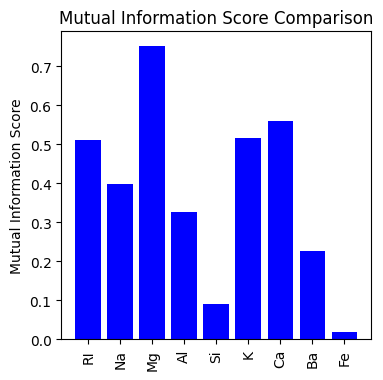

In [29]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score_us[:9], color='blue') #we take only the 9 first elements of MI_scire_us to kepp same arrays lengths and to get rid of type
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

### Applying the correlation matrix

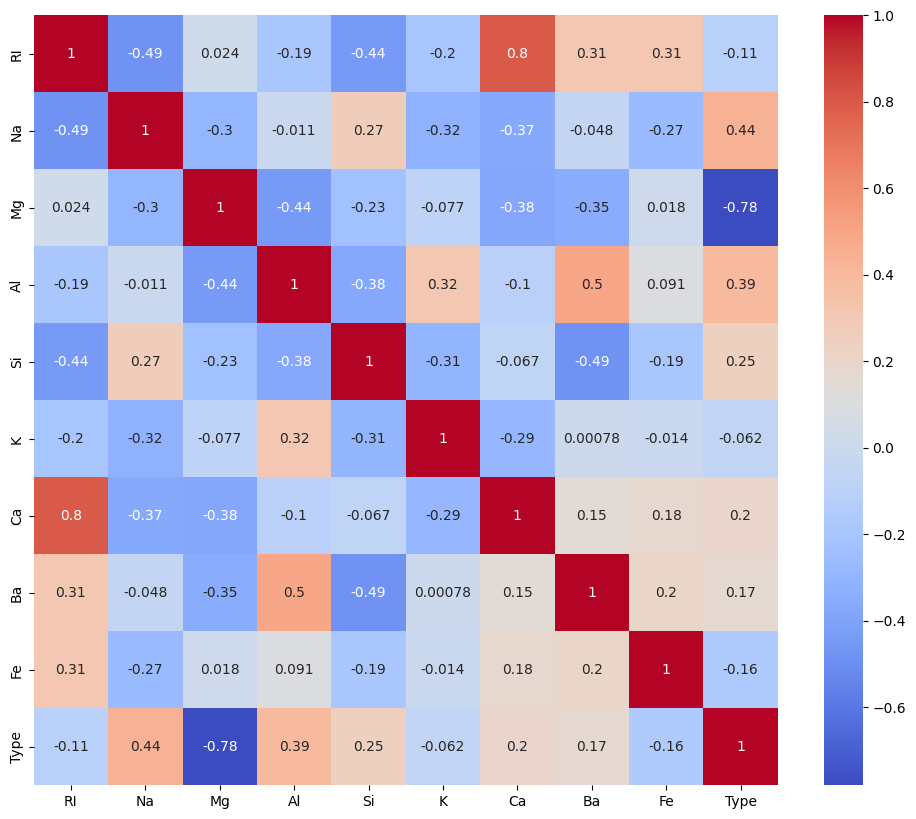

In [30]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor_us = data1.corr()
sns.heatmap(cor_us, annot=True, cmap='coolwarm')
plt.show()

In [31]:
#Correlation with output variable
cor_target_us = abs(cor_us["Type"])
#Selecting highly correlated features
relevant_features_us = cor_target_us[cor_target_us>0.35]
relevant_features_sorted_us = relevant_features_us.sort_values(ascending=False)
feature_us_corr0=relevant_features_sorted_us[1:5]
feature_us_corr=list(feature_us_corr0.index)

### Selecting Kbest

In [32]:
# Use SelectKBest to select the best features based on univariate test results
selector_us = SelectKBest(k=4)
X_us = selector_us.fit_transform(X1, y1)
print(X_us.shape)
print(selector_us.scores_)
print(selector_us.feature_names_in_)


(54, 4)
[ 0.48224  7.88232 20.83593  6.38002  1.79515  2.30041  1.23866  1.59164
  1.20122]
['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe']


In [33]:
mask_us = selector_us.get_support() #list of booleans
new_features_us = [] # The list of your K best features
for bool_val, feature in zip(mask_us, feature_names):
    if bool_val:
        new_features_us.append(feature)
feature_us_skb=new_features_us

### Forward feature selection

In [34]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier()

# Initialize the Sequential Feature Selector
chosen_features=4
sfs_us = SFS(clf, 
           k_features=chosen_features, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

# Fit the SFS to the data
sfs_us = sfs_us.fit(X1, y1)

# Get the selected features
selected_features_us = list(sfs_us.k_feature_idx_)
print("Selected features:", sfs_us.subsets_[chosen_features]["feature_names"])
print(sfs_us.subsets_)
feature_us_rf=list(sfs_us.subsets_[chosen_features]["feature_names"])

Selected features: ('RI', 'Mg', 'Al', 'K')
{1: {'feature_idx': (5,), 'cv_scores': array([0.27273, 0.45455, 0.54545, 0.36364, 0.6    ]), 'avg_score': 0.44727272727272727, 'feature_names': ('K',)}, 2: {'feature_idx': (0, 5), 'cv_scores': array([0.54545, 0.90909, 0.63636, 0.45455, 0.6    ]), 'avg_score': 0.6290909090909091, 'feature_names': ('RI', 'K')}, 3: {'feature_idx': (0, 2, 5), 'cv_scores': array([0.63636, 1.     , 0.63636, 0.54545, 0.7    ]), 'avg_score': 0.7036363636363635, 'feature_names': ('RI', 'Mg', 'K')}, 4: {'feature_idx': (0, 2, 3, 5), 'cv_scores': array([0.63636, 0.90909, 0.54545, 0.54545, 0.9    ]), 'avg_score': 0.7072727272727273, 'feature_names': ('RI', 'Mg', 'Al', 'K')}}


### Exhaustive feature selection

In [36]:
knn = KNeighborsClassifier()
efs = EFS(estimator=knn, # The Ml model
 min_features=1, 
 max_features=9, 
 scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
 cv=5) 

efs_us = efs.fit(X1, y1)
print('Best accuracy score: %.2f' % efs_us.best_score_) # best_score_ shows the best score 
print('Best subset (corresponding names):', efs_us.best_feature_names_) 
# best_feature_names_ shows the feature names that yield the best score
feature_us_knn=list(efs_us.best_feature_names_)


Features: 511/511

Best accuracy score: 0.67
Best subset (corresponding names): ('Na', 'Mg', 'Al', 'Si', 'K', 'Ba')


In [37]:
# Transform the dataset
X_us = efs.transform(X1)
# Print the results
print('Number of features before transformation: {}'.format(X1.shape[1]))
print('Number of features after transformation: {}'.format(X_us.shape[1]))


Number of features before transformation: 9
Number of features after transformation: 6


In [38]:
# Show the performance of each subset of features
efs_results_us = pd.DataFrame.from_dict(efs_us.get_metric_dict()).T
efs_results_us.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results_us

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
8,"(8,)","[0.09090909090909091, 0.2727272727272727, 0.18...",0.203636,"(Fe,)",0.086686,0.067444,0.033722
29,"(2, 8)","[0.2727272727272727, 0.2727272727272727, 0.363...",0.24,"(Mg, Fe)",0.116751,0.090836,0.045418
38,"(4, 8)","[0.18181818181818182, 0.18181818181818182, 0.2...",0.24,"(Si, Fe)",0.090387,0.070324,0.035162
123,"(4, 6, 8)","[0.2727272727272727, 0.36363636363636365, 0.36...",0.256364,"(Si, Ca, Fe)",0.132689,0.103237,0.051618
124,"(4, 7, 8)","[0.2727272727272727, 0.18181818181818182, 0.36...",0.258182,"(Si, Ba, Fe)",0.08282,0.064437,0.032218
...,...,...,...,...,...,...,...
81,"(1, 3, 6)","[0.8181818181818182, 0.7272727272727273, 0.636...",0.645455,"(Na, Al, Ca)",0.149634,0.11642,0.05821
207,"(1, 3, 6, 7)","[0.7272727272727273, 0.7272727272727273, 0.636...",0.647273,"(Na, Al, Ca, Ba)",0.091825,0.071443,0.035722
265,"(0, 1, 2, 5, 7)","[0.7272727272727273, 0.8181818181818182, 0.727...",0.647273,"(RI, Na, Mg, K, Ba)",0.202974,0.15792,0.07896
325,"(1, 2, 3, 4, 5)","[0.7272727272727273, 0.7272727272727273, 0.727...",0.649091,"(Na, Mg, Al, Si, K)",0.183948,0.143118,0.071559


In [39]:
#list of features chosen by three filters in undersampling
print(feature_us_ig) #information gain filter
print(feature_us_corr) #correlation filter
print(feature_us_skb) #select Kbest filter
#list of features chosen by the two wrappers in undersampling
print(feature_us_rf) #random forest wrapper
print(feature_us_knn) #K nearest neighbor wrapper

['Mg', 'Ca', 'K', 'RI']
['Mg', 'Na', 'Al']
['Na', 'Mg', 'Al', 'K']
['RI', 'Mg', 'Al', 'K']
['Na', 'Mg', 'Al', 'Si', 'K', 'Ba']


### Dataset Transformation Function

In [40]:
def dataset_transformer(data,desired_features=list):
    new_data=data[desired_features]
    new_data["Type"]=data["Type"]
    return new_data

In [41]:
data_us_ig=dataset_transformer(data1,feature_us_ig)#information gain undersampling dataset
data_us_corr=dataset_transformer(data1,feature_us_corr)#correlation undersampling dataset
data_us_skb=dataset_transformer(data1,feature_us_skb)#select Kbest undersampling dataset
data_us_rf=dataset_transformer(data1,feature_us_rf)#random forest undersampling dataset
data_us_knn=dataset_transformer(data1,feature_us_knn)#K nearest neighbor undersampling dataset


## Classification for the 5 undersampled datasets

## Information gain

In [42]:
# Split the data into training and testing sets
X_us_ig=data_us_ig.drop("Type",axis="columns")
y_us_ig=data_us_ig["Type"]
X_us_ig_train, X_us_ig_test, y_us_ig_train, y_us_ig_test = train_test_split(X_us_ig,y_us_ig, test_size=0.2, random_state=42)

## Correlation matrix

In [43]:
# Split the data into training and testing sets
X_us_corr=data_us_corr.drop("Type",axis="columns")
y_us_corr=data_us_corr["Type"]
X_us_corr_train, X_us_corr_test, y_us_corr_train, y_us_corr_test = train_test_split(X_us_corr,y_us_corr, test_size=0.3, random_state=42)

## Select Kbest

In [44]:
# Split the data into training and testing sets
X_us_skb=data_us_skb.drop("Type",axis="columns")
y_us_skb=data_us_skb["Type"]
X_us_skb_train, X_us_skb_test, y_us_skb_train, y_us_skb_test = train_test_split(X_us_skb,y_us_skb, test_size=0.3, random_state=42)

## Random forest

In [45]:
# Split the data into training and testing sets
X_us_rf=data_us_rf.drop("Type",axis="columns")
y_us_rf=data_us_rf["Type"]
X_us_rf_train, X_us_rf_test, y_us_rf_train, y_us_rf_test = train_test_split(X_us_rf,y_us_rf, test_size=0.3, random_state=42)

## Exhaustive

In [46]:
# Split the data into training and testing sets
X_us_knn=data_us_knn.drop("Type",axis="columns")
y_us_knn=data_us_knn["Type"]
X_us_knn_train, X_us_knn_test, y_us_knn_train, y_us_knn_test = train_test_split(X_us_knn,y_us_knn, test_size=0.3, random_state=42)

## Decision Tree US

In [47]:

X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(X1, y1, 
                                                            test_size=0.3, random_state=42)

In [48]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_us_train, y_us_train)
y_us_pred= clf.predict(X_us_test)
acc2 = metrics.accuracy_score(y_us_test, y_us_pred)
print("Accuracy:", acc2)

Accuracy: 0.5294117647058824


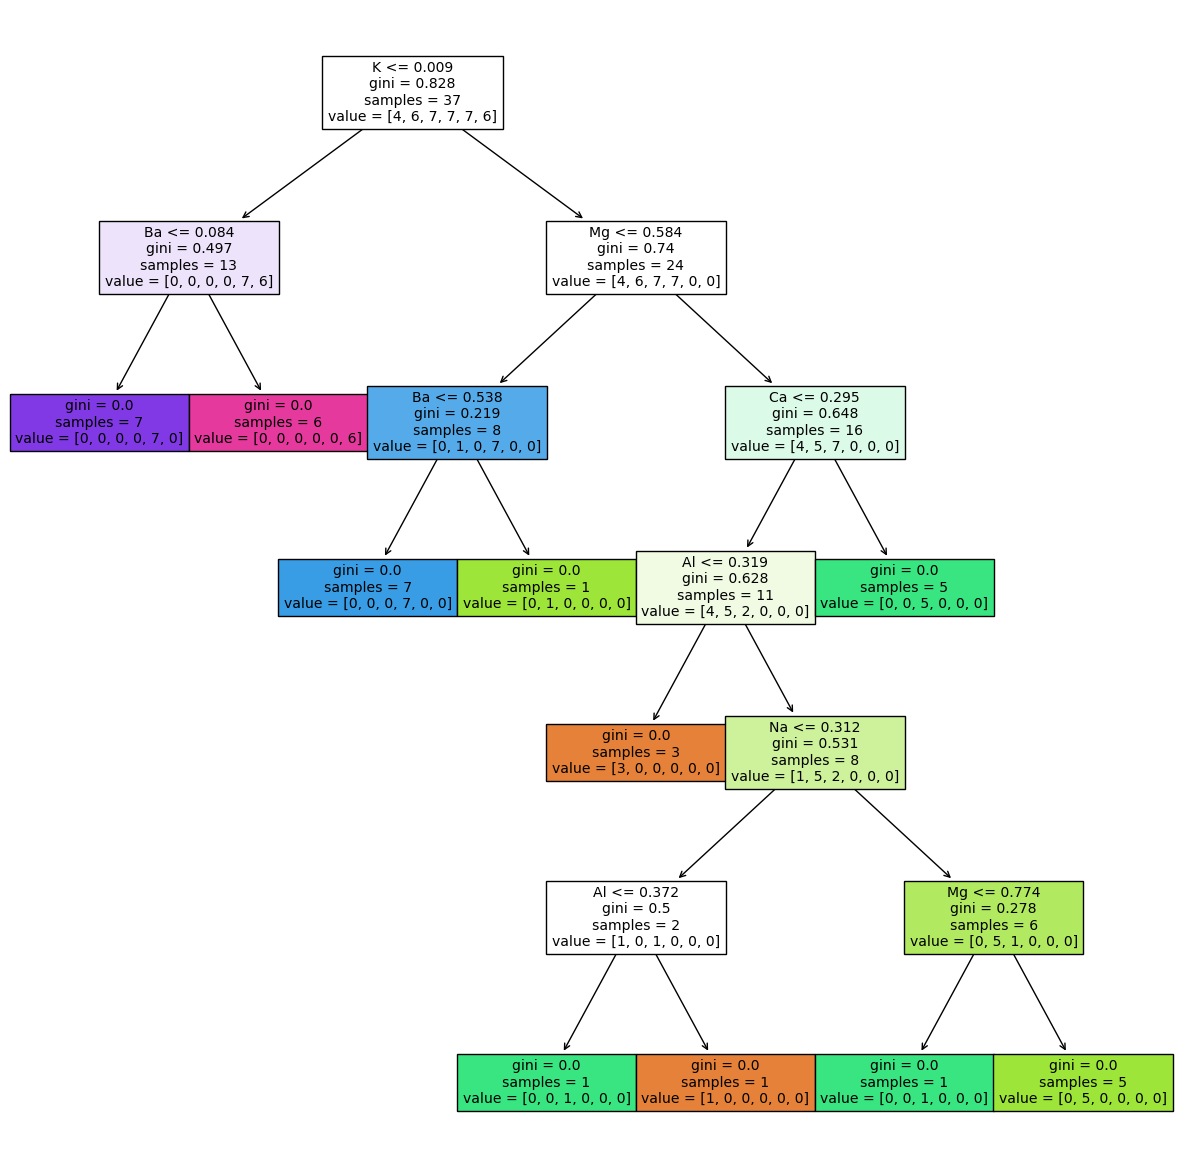

In [49]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf,
feature_names=feature_names,
filled=True)

In [50]:
DT = tree.DecisionTreeClassifier()
params = {
'criterion': ['gini', 'entropy'],
'max_depth': [2, 4, 6, 8, 10],
'min_samples_split': [2, 4, 6, 8, 10],
'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid = GridSearchCV(DT, params, cv = 5, scoring = 'accuracy')
grid.fit(X1,y1)
print(grid.best_score_) 
print(grid.best_params_)
print(grid.best_estimator_)

0.76
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)


In [103]:
# Use a pruning algorithm to prune the decision tree US
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_us_train, y_us_train)
ccp_alphas = path.ccp_alphas[:-1]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_us_train, y_us_train)
    clfs.append(clf)

# Evaluate the pruned decision tree using the testing data
acc_scores = []
for clf in clfs:
    y_us_pred = clf.predict(X_us_test)
    acc_score = accuracy_score(y_us_test, y_us_pred)
    acc_scores.append(acc_score)


# Find the best pruning parameter based on accuracy score
best_clf = clfs[acc_scores.index(max(acc_scores))]

# Evaluate the best pruned decision tree using the testing data
y_us_pred = best_clf.predict(X_us_test)
acc_score = accuracy_score(y_us_test, y_us_pred)
print("Accuracy score: {:.2f}".format(acc_score))


print("ccp_alpha: {:.3f}".format(ccp_alphas[acc_scores.index(max(acc_scores))]))

Accuracy score: 0.59
ccp_alpha: 0.044


## Oversampled Dataset

### Information gain

In [51]:
feature_os_ig0=[] #
MI_score_os = mutual_info_classif(X2, y2, random_state=0)
for feature in zip(feature_names, MI_score_os):
 print(feature)
 feature_os_ig0.append(feature)

('RI', 1.1962144564188417)
('Na', 1.1082574223597024)
('Mg', 1.0226961475465353)
('Al', 1.102686428803745)
('Si', 0.9980331941064362)
('K', 0.912595280945907)
('Ca', 1.1942565526735096)
('Ba', 0.37289991125499045)
('Fe', 0.2208326546389232)


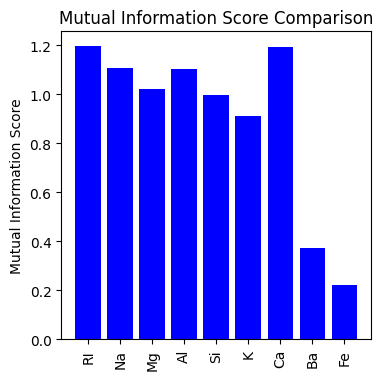

In [52]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score_os[:9], color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

In [53]:
#for each filter and each wrapper we will take a list of 4 features
feature_os_ig0=sorted(feature_os_ig0, key=lambda x: x[1], reverse=True) 
#since we've got list of tuples we sort using second element of tuple
feature_os_ig0=feature_os_ig0[:4]
#we take best 4 results
feature_os_ig=[x[0] for x in feature_os_ig0]
#we extract first element of each tuple to get just list of features without scores
feature_os_ig

['RI', 'Ca', 'Na', 'Al']

### Applying correlation matrix

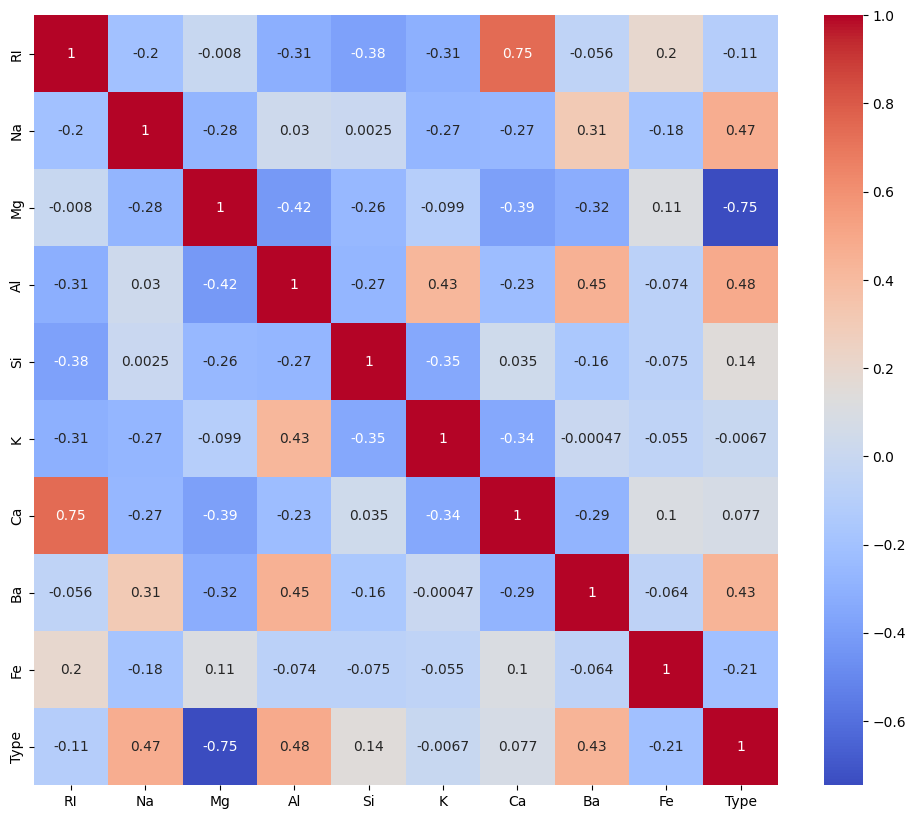

In [54]:
selector_os = SelectKBest(k=4)
X_os = selector_os.fit_transform(X2, y2)
mask_os = selector_os.get_support() #list of booleans
new_features_os = [] # The list of your K best features
for bool_val, feature in zip(mask_os, feature_names):
    if bool_val:
        new_features_os.append(feature)
new_features_os#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor_os = data2.corr()
sns.heatmap(cor_os, annot=True, cmap='coolwarm')
plt.show()

In [55]:
#Correlation with output variable
cor_target_os = abs(cor_os["Type"])
#Selecting highly correlated features
relevant_features_os = cor_target_os[cor_target_os>0.35]
relevant_features_sorted_os = relevant_features_os.sort_values(ascending=False)
feature_os_corr0=relevant_features_sorted_os[1:5]
feature_os_corr=list(feature_os_corr0.index)
feature_os_corr

['Mg', 'Al', 'Na', 'Ba']

In [56]:
#Correlation with output variable
cor_target_us = abs(cor_us["Type"])
#Selecting highly correlated features
relevant_features_us = cor_target_us[cor_target_us>0.35]


### Selecting Kbest

In [57]:
selector_os = SelectKBest(k=4)
X_os = selector_os.fit_transform(X2, y2)
mask_os = selector_os.get_support() #list of booleans
new_features_os = [] # The list of your K best features
for bool_val, feature in zip(mask_os, feature_names):
    if bool_val:
        new_features_os.append(feature)
feature_os_skb=new_features_os

### Forward feature selection

In [58]:
#!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [59]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier()

# Initialize the Sequential Feature Selector
chosen_features=4
sfs_os = SFS(clf, 
           k_features=chosen_features, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

# Fit the SFS to the data
sfs_os = sfs_os.fit(X2, y2)

# Get the selected features
selected_features_os = list(sfs_os.k_feature_idx_)
print("Selected features:", sfs_os.subsets_[chosen_features]["feature_names"])
feature_os_rf=list(sfs_os.subsets_[chosen_features]["feature_names"])

Selected features: ('RI', 'Al', 'Ca', 'Ba')


### Exhaustive feature selection 

In [60]:
knn = KNeighborsClassifier()
efs = EFS(estimator=knn, # The Ml model
min_features=1,
max_features=9,
scoring='accuracy', # The metric to use to evaluate the classifier is accuracy
cv=5)
efs_os = efs.fit(X2, y2)
print('Best accuracy score: %.2f' % efs_os.best_score_) # best_score_ shows the best score
print('Best subset (corresponding names):', efs_os.best_feature_names_)
# best_feature_names_ shows the feature names that yield the best score
feature_os_knn=list(efs_os.best_feature_names_)

Features: 511/511

Best accuracy score: 0.86
Best subset (corresponding names): ('RI', 'Si', 'K', 'Ca', 'Ba')


In [61]:
# Transform the dataset
X_new_os = efs_os.transform(X2)
# Print the results
print('Number of features before transformation: {}'.format(X2.shape[1]))
print('Number of features after transformation: {}'.format(X_new_os.shape[1]))

Number of features before transformation: 9
Number of features after transformation: 5


In [62]:
# Show the performance of each subset of features
efs_results_os = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results_os.sort_values(by='avg_score', ascending=True, inplace=True)
#efs_results_os

### Resulted lists of the 3 filters and 2 wrappers 

In [63]:
#list of features chosen by three filters in oversampling
print(feature_os_ig) #information gain filter
print(feature_os_corr) #correlation filter
print(feature_us_skb) #select Kbest filter
#list of features chosen by two wrappers in oversampling
print(feature_os_rf) #randomforest wrapper
print(feature_os_knn) #efs wrapper

['RI', 'Ca', 'Na', 'Al']
['Mg', 'Al', 'Na', 'Ba']
['Na', 'Mg', 'Al', 'K']
['RI', 'Al', 'Ca', 'Ba']
['RI', 'Si', 'K', 'Ca', 'Ba']


In [64]:
data_os_ig=dataset_transformer(data2,feature_os_ig)#information gain oversampling dataset
data_os_corr=dataset_transformer(data2,feature_os_corr)#correlation oversampling dataset
data_os_skb=dataset_transformer(data2,feature_os_skb)#select Kbest oversampling dataset
data_os_rf=dataset_transformer(data2,feature_os_rf)#random forest oversampling dataset
data_os_knn=dataset_transformer(data2,feature_os_knn)#K nearest oversampling dataset

## Classification for the 5 oversampled datasets

## Information gain

In [65]:
X_os_ig = data_os_ig.drop("Type", axis=1)
y_os_ig =  data_os_ig["Type"]
X_os_ig_train, X_os_ig_test, y_os_ig_train, y_os_ig_test = train_test_split(X_os_ig, y_os_ig, 
                                                            test_size=0.3, random_state=42)

## Correlation matrix 

In [66]:
X_os_corr = data_os_corr.drop("Type", axis=1)
y_os_corr =  data_os_corr["Type"]
X_os_corr_train, X_os_corr_test, y_os_corr_train, y_os_corr_test = train_test_split(X_os_corr, y_os_corr, 
                                                            test_size=0.3, random_state=42)

## Select Kbest

In [67]:
X_os_skb = data_os_skb.drop("Type", axis=1)
y_os_skb =  data_os_skb["Type"]
X_os_skb_train, X_os_skb_test, y_os_skb_train, y_os_skb_test = train_test_split(X_os_skb, y_os_skb, 
                                                            test_size=0.3, random_state=42)

## Random forest

In [68]:
X_os_rf = data_os_rf.drop("Type", axis=1)
y_os_rf =  data_os_rf["Type"]
X_os_rf_train, X_os_rf_test, y_os_rf_train, y_os_rf_test = train_test_split(X_os_rf, y_os_rf, 
                                                            test_size=0.3, random_state=42)

## Exhaustive

In [69]:
X_os_knn = data_os_knn.drop("Type", axis=1)
y_os_knn =  data_os_knn["Type"]
X_os_knn_train, X_os_knn_test, y_os_knn_train, y_os_knn_test = train_test_split(X_os_knn, y_os_knn, 
                                                            test_size=0.3, random_state=42)

##  Decision tree OS 

In [70]:

X_os_train, X_os_test, y_os_train, y_os_test = train_test_split(X2, y2, 
                                                            test_size=0.3, random_state=42)

In [71]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_os_train, y_os_train)
y_os_pred= clf.predict(X_os_test)
acc2 = metrics.accuracy_score(y_os_test, y_os_pred)
print("Accuracy:", acc2)

Accuracy: 0.9124087591240876


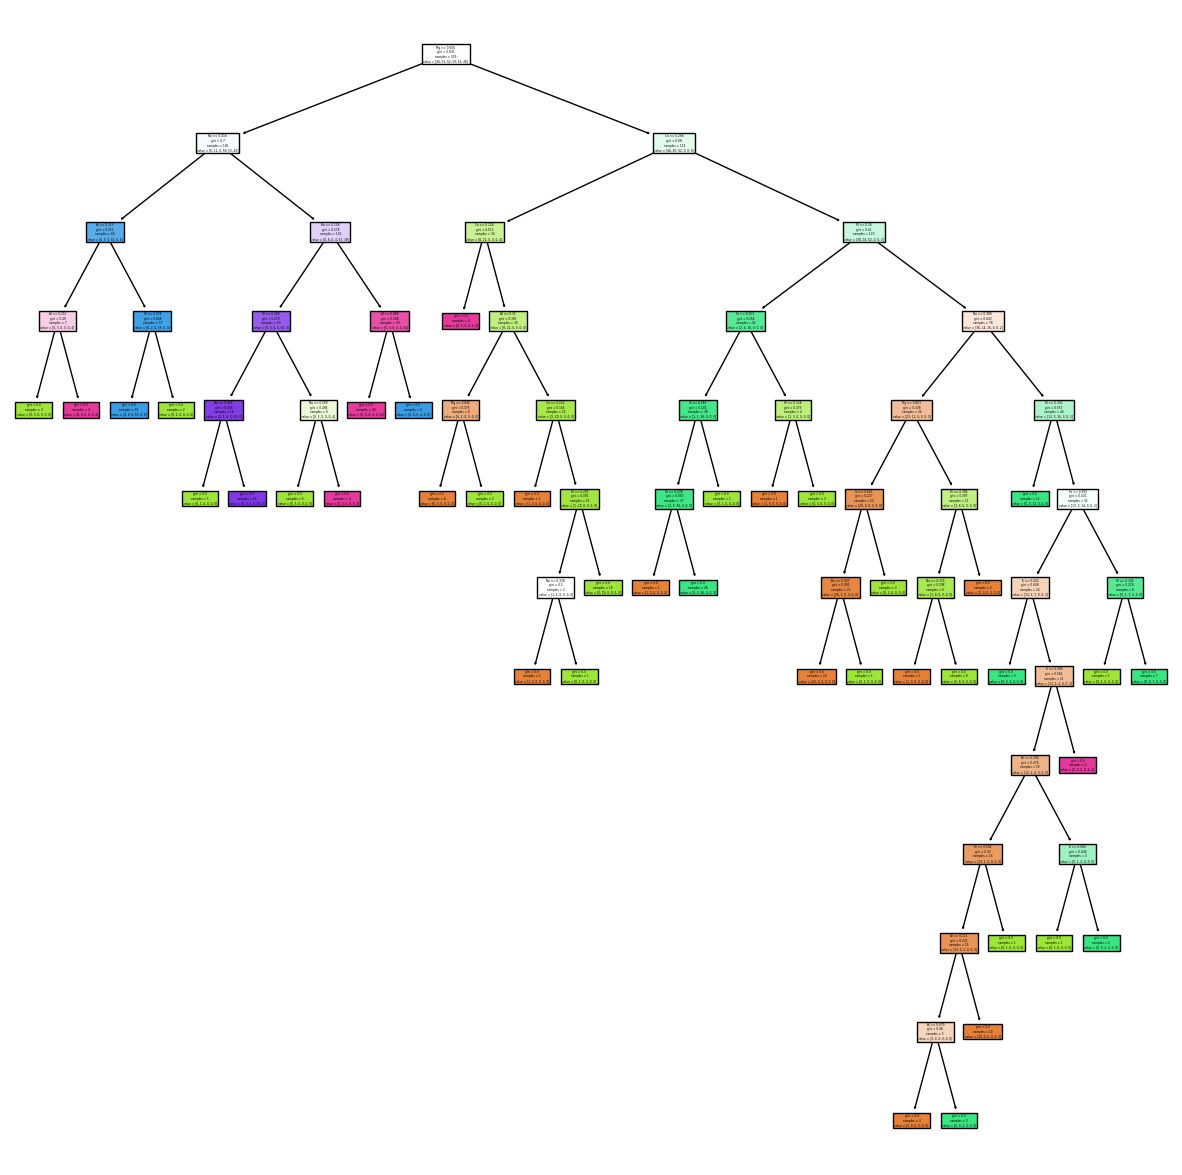

In [72]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf,
feature_names=feature_names,
filled=True)

In [73]:
DT = tree.DecisionTreeClassifier()
params = {
'criterion': ['gini', 'entropy'],
'max_depth': [2, 4, 6, 8, 10],
'min_samples_split': [2, 4, 6, 8, 10],
'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid = GridSearchCV(DT, params, cv = 10, scoring = 'accuracy')
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6632034632034632
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 6}
DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=6)


In [74]:
# Use a pruning algorithm to prune the decision tree OS
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_os_train, y_os_train)
ccp_alphas = path.ccp_alphas[:-1]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_os_train, y_os_train)
    clfs.append(clf)

# Evaluate the pruned decision tree using the testing data
acc_scores = []
for clf in clfs:
    y_os_pred = clf.predict(X_os_test)
    acc_score = accuracy_score(y_os_test, y_os_pred)
    acc_scores.append(acc_score)


# Find the best pruning parameter based on accuracy score
best_clf = clfs[acc_scores.index(max(acc_scores))]

# Evaluate the best pruned decision tree using the testing data
y_os_pred = best_clf.predict(X_os_test)
acc_score = accuracy_score(y_os_test, y_os_pred)
print("Accuracy score: {:.2f}".format(acc_score))


print("ccp_alpha: {:.3f}".format(ccp_alphas[acc_scores.index(max(acc_scores))]))

Accuracy score: 0.91
ccp_alpha: 0.004


# SMOTE Dataset

### Information gain

In [75]:
feature_smt_ig0=[] #
MI_score_smt = mutual_info_classif(X3, y3, random_state=0)
for feature in zip(feature_names, MI_score_smt):
 print(feature)
 feature_smt_ig0.append(feature)

('RI', 0.7178544990449023)
('Na', 0.5929106833538409)
('Mg', 0.8449667627552746)
('Al', 0.644489220122173)
('Si', 0.4182697841862235)
('K', 0.739728990724599)
('Ca', 0.7045238668211469)
('Ba', 0.3584384108774268)
('Fe', 0.1010558630846603)


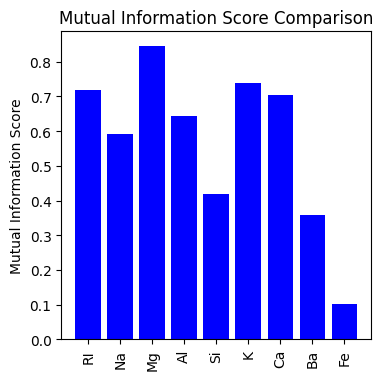

In [76]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score_smt[:9], color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

In [77]:
#for each filter and each wrapper we will take a list of 4 features
feature_smt_ig0=sorted(feature_smt_ig0, key=lambda x: x[1], reverse=True) 
#since we've got list of tuples we sort using second element of tuple
feature_smt_ig0=feature_smt_ig0[:4]
#we take best 4 results
feature_smt_ig=[x[0] for x in feature_smt_ig0]
#we extract first element of each tuple to get just list of features without scores
feature_smt_ig

['Mg', 'K', 'RI', 'Ca']

### Correlation matrix

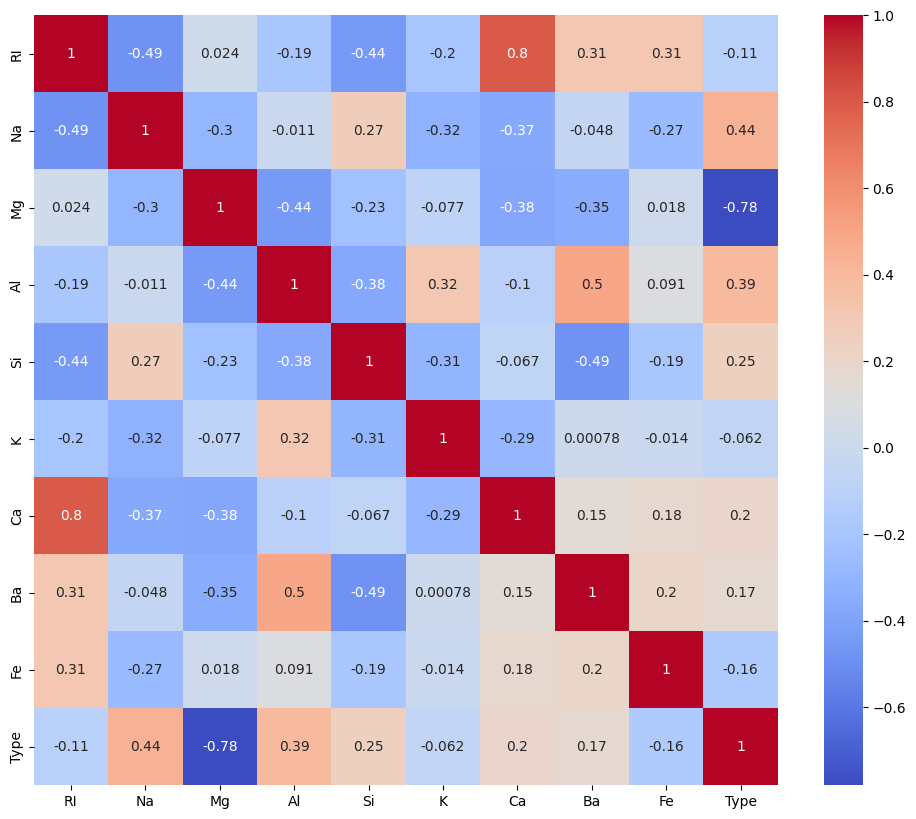

In [78]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor_smt = data3.corr()
sns.heatmap(cor_us, annot=True, cmap='coolwarm')
plt.show()

In [79]:
#Correlation with output variable
cor_target_smt = abs(cor_smt["Type"])
#Selecting highly correlated features
relevant_features_smt = cor_target_smt[cor_target_smt>0.35]
relevant_features_sorted_smt = relevant_features_smt.sort_values(ascending=False)
feature_smt_corr0=relevant_features_sorted_smt[1:5]
feature_smt_corr=list(feature_smt_corr0.index)
feature_smt_corr

['Mg', 'Na', 'Al', 'Ba']

In [80]:
#Correlation with output variable
cor_target_smt = abs(cor_smt["Type"])
#Selecting highly correlated features
relevant_features_smt = cor_target_smt[cor_target_smt>0.35]


### Select Kbest

In [81]:
selector_smt = SelectKBest(k=4)
X_smt = selector_smt.fit_transform(X2, y2)
mask_smt = selector_smt.get_support() #list of booleans
new_features_smt = [] # The list of your K best features
for bool_val, feature in zip(mask_smt, feature_names):
    if bool_val:
        new_features_smt.append(feature)
feature_smt_skb=new_features_smt

### Forward feature selection

In [82]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier()

# Initialize the Sequential Feature Selector
chosen_features=4
sfs_smt = SFS(clf, 
           k_features=chosen_features, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

# Fit the SFS to the data
sfs_smt = sfs_smt.fit(X2, y2)

# Get the selected features
selected_features_smt = list(sfs_smt.k_feature_idx_)
print("Selected features:", sfs_smt.subsets_[chosen_features]["feature_names"])
feature_smt_rf=list(sfs_smt.subsets_[chosen_features]["feature_names"])

Selected features: ('RI', 'Mg', 'Al', 'Ba')


### Exhaustive feature selection

In [83]:
knn = KNeighborsClassifier()
efs = EFS(estimator=knn, # The Ml model
 min_features=1, 
 max_features=9, 
 scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
 cv=5) 

efs_smt = efs.fit(X3, y3)
print('Best accuracy score: %.2f' % efs_smt.best_score_) # best_score_ shows the best score 
print('Best subset (corresponding names):', efs_smt.best_feature_names_) 
# best_feature_names_ shows the feature names that yield the best score
feature_smt_knn=list(efs_smt.best_feature_names_)


Features: 511/511

Best accuracy score: 0.87
Best subset (corresponding names): ('RI', 'Na', 'Al', 'Si', 'Ca', 'Ba')


In [84]:
# Transform the dataset
X_smt = efs.transform(X3)
# Print the results
print('Number of features before transformation: {}'.format(X3.shape[1]))
print('Number of features after transformation: {}'.format(X_smt.shape[1]))



Number of features before transformation: 9
Number of features after transformation: 6


In [85]:
# Show the performance of each subset of features
efs_results_smt = pd.DataFrame.from_dict(efs_smt.get_metric_dict()).T
efs_results_smt.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results_smt

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
8,"(8,)","[0.16304347826086957, 0.16483516483516483, 0.2...",0.193048,"(Fe,)",0.03577,0.02783,0.013915
7,"(7,)","[0.32608695652173914, 0.3076923076923077, 0.29...",0.313569,"(Ba,)",0.015945,0.012405,0.006203
44,"(7, 8)","[0.31521739130434784, 0.34065934065934067, 0.3...",0.322384,"(Ba, Fe)",0.019501,0.015173,0.007586
4,"(4,)","[0.34782608695652173, 0.34065934065934067, 0.3...",0.353082,"(Si,)",0.02897,0.02254,0.01127
38,"(4, 8)","[0.3804347826086957, 0.3516483516483517, 0.406...",0.374988,"(Si, Fe)",0.032397,0.025206,0.012603
...,...,...,...,...,...,...,...
388,"(0, 1, 2, 3, 6, 7)","[0.8478260869565217, 0.8681318681318682, 0.846...",0.859675,"(RI, Na, Mg, Al, Ca, Ba)",0.02229,0.017343,0.008671
271,"(0, 1, 3, 4, 6)","[0.8260869565217391, 0.9010989010989011, 0.802...",0.859723,"(RI, Na, Al, Si, Ca)",0.051203,0.039838,0.019919
468,"(0, 1, 2, 3, 4, 6, 7)","[0.8586956521739131, 0.8681318681318682, 0.835...",0.861849,"(RI, Na, Mg, Al, Si, Ca, Ba)",0.019057,0.014827,0.007414
471,"(0, 1, 2, 3, 5, 6, 7)","[0.8695652173913043, 0.8791208791208791, 0.846...",0.864023,"(RI, Na, Mg, Al, K, Ca, Ba)",0.026286,0.020451,0.010226


In [86]:
#list of features chosen by three filters in smote
print(feature_smt_ig) #information gain filter
print(feature_smt_corr) #correlation filter
print(feature_smt_skb) #select Kbest filter
#list of features chosen by the two wrappers in smote
print(feature_smt_rf) #random forest wrapper
print(feature_smt_knn) #K nearest neighbor wrapper

['Mg', 'K', 'RI', 'Ca']
['Mg', 'Na', 'Al', 'Ba']
['Na', 'Mg', 'Al', 'Ba']
['RI', 'Mg', 'Al', 'Ba']
['RI', 'Na', 'Al', 'Si', 'Ca', 'Ba']


### Dataset Transformation

In [87]:
data_smt_ig=dataset_transformer(data3,feature_smt_ig)#information gain smote dataset
data_smt_corr=dataset_transformer(data3,feature_smt_corr)#correlation smote dataset
data_smt_skb=dataset_transformer(data3,feature_smt_skb)#select Kbest smote dataset
data_smt_rf=dataset_transformer(data3,feature_smt_rf)#random forest smote dataset
data_smt_knn=dataset_transformer(data3,feature_smt_knn)#K nearest neighbor smote dataset


## Classification for the 5 smote datasets

## Information gain

In [88]:
X_smt_ig = data_smt_ig.drop("Type", axis=1)
y_smt_ig =  data_smt_ig["Type"]
X_smt_ig_train, X_smt_ig_test, y_smt_ig_train, y_smt_ig_test = train_test_split(X_smt_ig, y_smt_ig, 
                                                            test_size=0.3, random_state=42)


## Correlation matrix

In [89]:
X_smt_corr = data_smt_corr.drop("Type", axis=1)
y_smt_corr =  data_smt_corr["Type"]
X_smt_corr_train,X_smt_corr_test, y_smt_corr_train, y_smt_corr_test = train_test_split(X_smt_corr, y_smt_corr, 
                                                            test_size=0.3, random_state=42)

## Select Kbest

In [90]:
X_smt_skb = data_smt_skb.drop("Type", axis=1)
y_smt_skb =  data_smt_skb["Type"]
X_smt_skb_train, X_smt_skb_test, y_smt_skb_train, y_smt_skb_test = train_test_split(X_smt_skb, y_smt_skb, 
                                                            test_size=0.3, random_state=42)

## Random forest

In [91]:
X_smt_rf = data_smt_rf.drop("Type", axis=1)
y_smt_rf =  data_smt_rf["Type"]
X_smt_rf_train, X_smt_rf_test, y_smt_rf_train, y_smt_rf_test = train_test_split(X_smt_rf, y_smt_rf, 
                                                            test_size=0.3, random_state=42)

## Exhaustive

In [92]:
X_smt_knn = data_smt_knn.drop("Type", axis=1)
y_smt_knn =  data_smt_knn["Type"]
X_smt_knn_train, X_smt_knn_test, y_smt_knn_train, y_smt_knn_test = train_test_split(X_smt_knn, y_smt_knn, 
                                                            test_size=0.3, random_state=42)

##  Decision tree SMT 

In [93]:

X_smt_train, X_smt_test, y_smt_train, y_smt_test = train_test_split(X3, y3, 
                                                            test_size=0.3, random_state=42)

In [94]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_smt_train, y_smt_train)
y_smt_pred= clf.predict(X_smt_test)
acc2 = [metrics.accuracy_score(y_smt_test, y_smt_pred), metrics.f1_score(y_smt_test, y_smt_pred,average='micro'),
              metrics.precision_score(y_smt_test, y_smt_pred,average='micro'),
              metrics.recall_score(y_smt_test, y_smt_pred,average='micro')]
        
print("Accuracy:", acc2)

Accuracy: [0.8248175182481752, 0.8248175182481752, 0.8248175182481752, 0.8248175182481752]


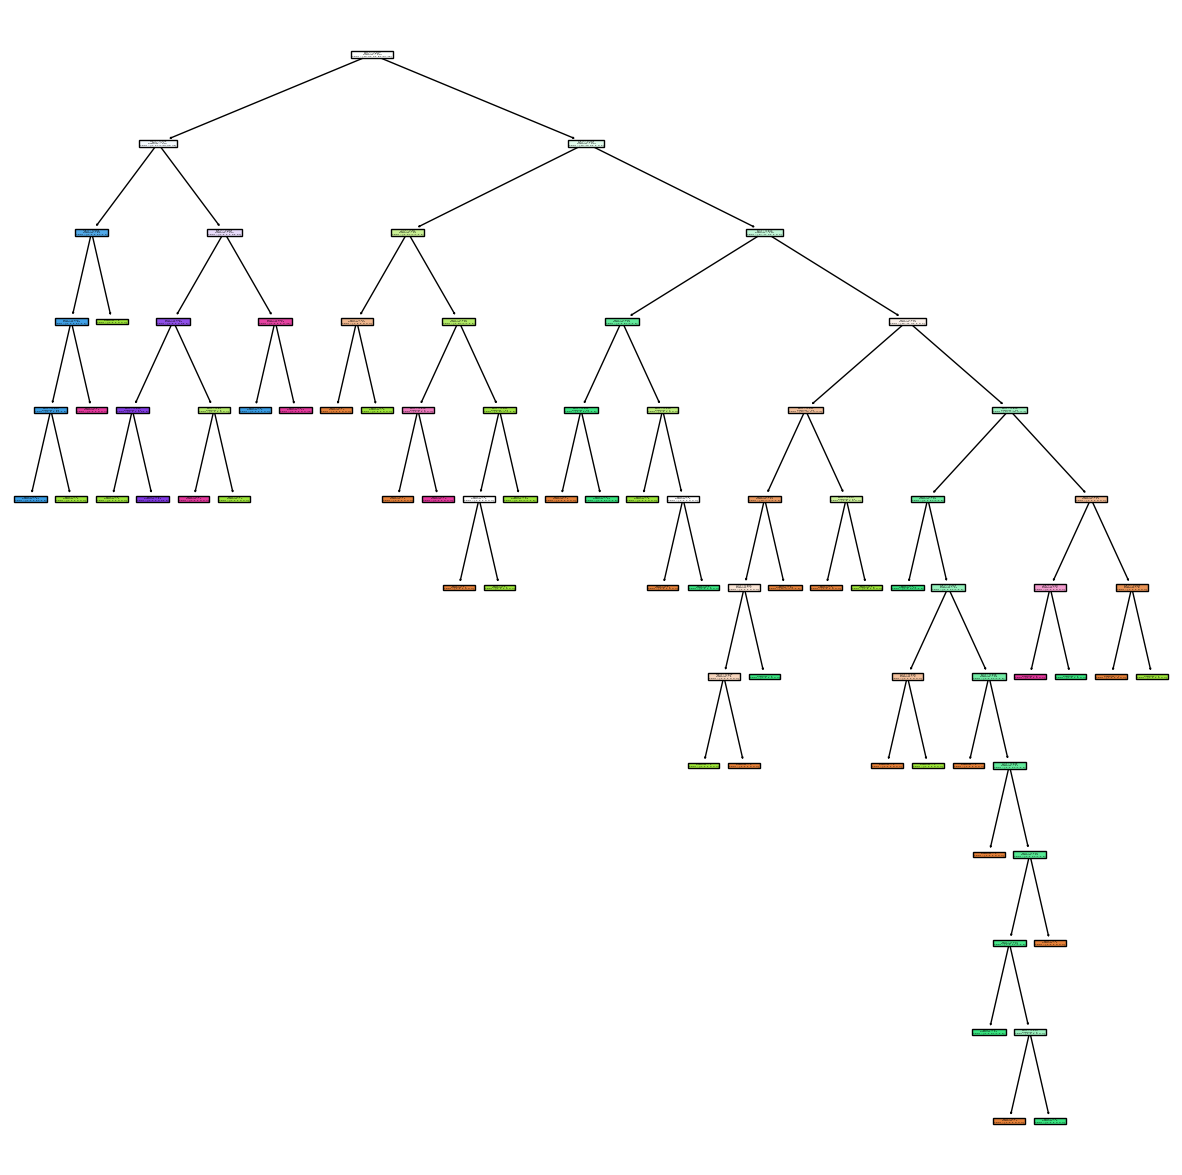

In [95]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf,
feature_names=feature_names,
filled=True)

In [96]:
# Use a pruning algorithm to prune the decision tree SMT
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_smt_train, y_smt_train)
ccp_alphas = path.ccp_alphas[:-1]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_smt_train, y_smt_train)
    clfs.append(clf)

# Evaluate the pruned decision tree using the testing data
acc_scores = []
for clf in clfs:
    y_smt_pred = clf.predict(X_smt_test)
    acc_score = accuracy_score(y_smt_test, y_smt_pred)
    acc_scores.append(acc_score)


# Find the best pruning parameter based on accuracy score
best_clf = clfs[acc_scores.index(max(acc_scores))]

# Evaluate the best pruned decision tree using the testing data
y_smt_pred = best_clf.predict(X_smt_test)
acc_score = accuracy_score(y_smt_test, y_smt_pred)
print("Accuracy score: {:.2f}".format(acc_score))


print("ccp_alpha: {:.3f}".format(ccp_alphas[acc_scores.index(max(acc_scores))]))

Accuracy score: 0.85
ccp_alpha: 0.003


# Function to generate all metrics

In [97]:
def metric_func(X,Y,X_train,Y_train,X_test,Y_test):
    
    ######## knn with no grid search ########
    
    clf =  KNeighborsClassifier(n_neighbors=6)
    clf.fit(X_train, Y_train)
    y_pred= clf.predict(X_test)
    list_knn=[metrics.accuracy_score(Y_test, y_pred),
              metrics.f1_score(Y_test, y_pred,average='micro'),
              metrics.precision_score(Y_test, y_pred,average='micro'),
              metrics.recall_score(Y_test, y_pred,average='micro') 
             ] 
    
    ############ knn with gridsearch #########
    
    Knn2 = KNeighborsClassifier() 
    grid_param={'n_neighbors': range(1,31),
     'weights' : ['uniform', 'distance'], 
     'metric' : ['euclidean', 'manhattan', 'minkowski']} 
    grid = GridSearchCV(Knn2, grid_param, cv = 5, scoring = ['accuracy', 'f1_macro','recall_macro','precision_micro'], refit='accuracy')
    grid.fit(X,Y)
    
    list_knn_gs=[grid.cv_results_['mean_test_accuracy'][grid.best_index_],
                 grid.cv_results_['mean_test_f1_macro'][grid.best_index_],
                 grid.cv_results_['mean_test_precision_micro'][grid.best_index_],
                 grid.cv_results_['mean_test_recall_macro'][grid.best_index_]
                ]
    
   ############ svm with no gridsearch ########

    svm = SVC()
    svm.fit(X_train, Y_train)
    Y_pred= svm.predict(X_test)
    list_svm=[svm.score(X_test, Y_test),
              metrics.f1_score(Y_test, Y_pred, average='macro'),
              precision_score(Y_test, Y_pred, average='micro'),
              recall_score(Y_test,  Y_pred, average='macro')]

   ############ svm with gridsearch #########
    
    parametres = {"kernel":['linear','poly','rbf'],"C":[0.1,0.5,1.0,2.0]}
    #classifieur à utiliser
    svmc = SVC()
    #instanciation de la recherche
    grille = GridSearchCV(Knn2, grid_param, cv = 5, scoring = ['accuracy', 'f1_macro','recall_macro','precision_micro'], refit='accuracy')
    #lancer l'exploration
    resultats = grille.fit(X_train,Y_train)
    list_svm_gs=[resultats.cv_results_['mean_test_accuracy'][grille.best_index_],
                 resultats.cv_results_['mean_test_f1_macro'][grille.best_index_],
                 resultats.cv_results_['mean_test_precision_micro'][resultats.best_index_],
                 resultats.cv_results_['mean_test_recall_macro'][resultats.best_index_]
                ]
    
    ############ extracting the method name from the variable name  #########
    import inspect
    
    var_name = None
    calling_frame = inspect.currentframe().f_back
    for name, value in calling_frame.f_locals.items():
        if value is X:
            var_name = name
            break
    method_name= var_name[2:]
    
    ############ creating DataFrame out of outputs #########
    
    list_metrics=["Accuracy","F1_score","Precision","Recall"]
    list_methods=["Knn","Knn_gs","Svm","Svm_gs"]
    df = pd.DataFrame([list_knn,list_knn_gs,list_svm,list_svm_gs], index=list_methods , columns=list_metrics)
    new_index = pd.Index([method_name,method_name,method_name,method_name])
    new_multiindex = pd.MultiIndex.from_arrays([new_index,df.index]) #to add another index on the existing index
    df.index = new_multiindex
    return df
    
    

# Function to generate all metrics for Decision Trees

In [98]:
def metric_func_dt(X_train,Y_train,X_test,Y_test):
    
       ############ Decision Tree metrics ########
        
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, Y_train)
    y_pred= clf.predict(X_test)
    list_dt = [metrics.accuracy_score(Y_test, y_pred), 
            metrics.f1_score(Y_test, y_pred,average='micro'),
            metrics.precision_score(Y_test, y_pred,average='micro'),
            metrics.recall_score(Y_test, y_pred,average='micro')]
    ############ Decision Tree GridSearch metrics ########
    
    DT = tree.DecisionTreeClassifier()
    params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 4, 6, 8, 10],
        'min_samples_split': [2, 4, 6, 8, 10],
        'min_samples_leaf': [1, 2, 3, 4, 5]
    }
    grid = GridSearchCV(DT, params, cv = 10, scoring = ['accuracy','f1_macro','recall_macro','precision_micro'],refit='accuracy')
    grid.fit(X3,y3)
    list_dt_gs=[grid.cv_results_['mean_test_accuracy'][grid.best_index_],
                 grid.cv_results_['mean_test_f1_macro'][grid.best_index_],
                 grid.cv_results_['mean_test_precision_micro'][grid.best_index_],
                 grid.cv_results_['mean_test_recall_macro'][grid.best_index_]
                ] 
    
    ############ extracting the method name from the variable name  #########
    
    import inspect
    
    var_name = None
    calling_frame = inspect.currentframe().f_back
    for name, value in calling_frame.f_locals.items():
        if value is X_train:
            var_name = name
            break
    if len(var_name)==11:
        method_name= var_name[2:5]   
    else: 
        method_name= var_name[2:4]
        
    ############ creating DataFrame out of outputs #########
    
    list_metrics=["Accuracy","F1_score","Precision","Recall"]
    list_methods=["Decision Tree","Decision Tree GS"]
    df = pd.DataFrame([list_dt,list_dt_gs], index=list_methods , columns=list_metrics)
    new_index = pd.Index([method_name,method_name])
    new_multiindex = pd.MultiIndex.from_arrays([new_index,df.index]) #to add another index on the existing index
    df.index = new_multiindex
    return df


# Create one DataFrame with all metrics

In [99]:

    #generating all the 15 dataframes from different method with aggregating data
    
df1= metric_func(X_us_ig, y_us_ig, X_us_ig_train, y_us_ig_train, X_us_ig_test, y_us_ig_test)

df2= metric_func(X_us_corr, y_us_corr, X_us_corr_train, y_us_corr_train, X_us_corr_test, y_us_corr_test)

df3= metric_func(X_us_skb, y_us_skb, X_us_skb_train, y_us_skb_train, X_us_skb_test, y_us_skb_test)

df4= metric_func(X_us_rf, y_us_rf, X_us_rf_train, y_us_rf_train, X_us_rf_test, y_us_rf_test)

df5= metric_func(X_us_knn, y_us_knn, X_us_knn_train, y_us_knn_train, X_us_knn_test, y_us_knn_test)


df6= metric_func(X_os_ig, y_os_ig, X_os_ig_train, y_os_ig_train, X_os_ig_test, y_os_ig_test)

df7= metric_func(X_os_corr, y_os_corr, X_os_corr_train, y_os_corr_train, X_os_corr_test, y_os_corr_test)

df8= metric_func(X_os_skb, y_os_skb, X_os_skb_train, y_os_skb_train, X_os_skb_test, y_os_skb_test)

df9= metric_func(X_os_rf, y_os_rf, X_os_rf_train, y_os_rf_train, X_os_rf_test, y_os_rf_test)

df10= metric_func(X_os_knn, y_os_knn, X_os_knn_train, y_os_knn_train, X_os_knn_test, y_os_knn_test)


df11= metric_func(X_smt_ig, y_smt_ig, X_smt_ig_train, y_smt_ig_train, X_smt_ig_test, y_smt_ig_test)

df12= metric_func(X_smt_corr, y_smt_corr, X_smt_corr_train, y_smt_corr_train, X_smt_corr_test, y_smt_corr_test)

df13= metric_func(X_smt_skb, y_smt_skb, X_smt_skb_train, y_smt_skb_train, X_smt_skb_test, y_smt_skb_test)

df14= metric_func(X_smt_rf, y_smt_rf, X_smt_rf_train, y_smt_rf_train, X_smt_rf_test, y_smt_rf_test)

df15= metric_func(X_smt_knn, y_smt_knn, X_smt_knn_train, y_smt_knn_train, X_smt_knn_test, y_smt_knn_test)


df16= metric_func_dt(X_us_train,y_us_train,X_us_test,y_us_test)

df17= metric_func_dt(X_os_train,y_os_train,X_os_test,y_os_test)

df18= metric_func_dt(X_smt_train,y_smt_train,X_smt_test,y_smt_test)


    
    #concaatenating all the dfs to create final df of all the project
        
final_df = pd.concat([df1, df2 , df3 ,
                      df4, df5 , df6 ,
                      df7, df8 , df9 ,
                      df10,df11,df12 , 
                      df13,df14,df15 ,
                      df16,df17,df18
                     ])
        
   

In [101]:
final_df


Accuracy  F1_score  Precision    Recall
us_ig   Knn               0.636364  0.636364   0.636364  0.636364
        Knn_gs            0.721818  0.656667   0.721818  0.700000
        Svm               0.181818  0.103704   0.181818  0.222222
        Svm_gs            0.722222  0.662222   0.722222  0.733333
us_corr Knn               0.647059  0.647059   0.647059  0.647059
...                            ...       ...        ...       ...
us      Decision Tree GS  0.862077  0.855092   0.862077  0.860714
os      Decision Tree     0.883212  0.883212   0.883212  0.883212
        Decision Tree GS  0.866280  0.860556   0.866280  0.864881
smt     Decision Tree     0.824818  0.824818   0.824818  0.824818
        Decision Tree GS  0.864155  0.857447   0.864155  0.862500

[66 rows x 4 columns]

In [115]:
best_algo = final_df.loc[final_df['Accuracy'].idxmax()]
print(best_algo,"\n")

#it's oversampling information gain, using SVM with gridsearch


result = "Best Path is the OverSampling Dataset using Information Gain and SVM with GridSearch"  # Replace this with your project result

# Define an ASCII art banner
banner = """
 _   _      _ _     _____ 
| \ | |    | | |   |_   _|
|  \| | ___| | | ___ | |  
| . ` |/ _ \ | |/ _ \| |  
| |\  |  __/ | | (_) _| |_ 
\_| \_/\___|_|_|\___|_____|

"""

# Combine the banner and the result using f-strings
output = f"{banner}\n\nProject result is: {result}\n"

# Print the output
print(output)

Accuracy     0.924901
F1_score     0.918765
Precision    0.924901
Recall       0.919495
Name: (os_ig, Svm_gs), dtype: float64 


 _   _      _ _     _____ 
| \ | |    | | |   |_   _|
|  \| | ___| | | ___ | |  
| . ` |/ _ \ | |/ _ \| |  
| |\  |  __/ | | (_) _| |_ 
\_| \_/\___|_|_|\___|_____|



Project result is: Best Path is the OverSampling Dataset using Information Gain and SVM with GridSearch

